In [1]:
import tensorflow as tf
import keras
from keras.initializers import Constant
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
cifar10 = tf.keras.datasets.cifar10

In [3]:
# Load the training and test split of the dataset
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 75 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.75):

      # Stop if threshold is met
      print("\nAccuracy is greater than 0.75 so cancelling training.")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [6]:
def unsaturated(number, threshold):
    if number > threshold:
        return 1
    else:
        return 0

In [7]:
def unsaturated_tanh(number):
    if (number > -0.95) and (number <0.95):
        return 1
    else:
        return 0

In [8]:
Unsaturated=np.vectorize(unsaturated)

In [9]:
Unsaturated_tanh=np.vectorize(unsaturated_tanh)

In [10]:
# LAYER is a string 
def actProb(MODEL, LAYER):
    List=[]
    for image in test_images:
        intermediate_output = tf.keras.Model(MODEL.input, 
                                    MODEL.get_layer(LAYER).output)
        extracted = intermediate_output(image[None, ...])
        List.append(Unsaturated(extracted,0))
        
    X=np.array(List).sum(axis=0)/len(test_images)
    X=np.flip(np.sort(X.flatten()))
    return X

In [11]:
# LAYER is a string 
def actProb_tanh(MODEL, LAYER):
    List=[]
    for image in test_images:
        intermediate_output = tf.keras.Model(MODEL.input, 
                                    MODEL.get_layer(LAYER).output)
        extracted = intermediate_output(image[None, ...])
        List.append(Unsaturated_tanh(extracted))
        
    X=np.array(List).sum(axis=0)/len(test_images)
    X=np.flip(np.sort(X.flatten()))
    return X

### ReLU

In [12]:
# Build the classification model
modelR = tf.keras.models.Sequential([
    
    # Convolution Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    
    # Fully Connected Layers
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_uniform'), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
opt = SGD(lr=0.001, momentum=0.9)
modelR.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
modelR.fit(training_images, training_labels, epochs=5) # callbacks=[callbacks]

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4599 - accuracy: 0.8339
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3172 - accuracy: 0.8832
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2711 - accuracy: 0.8993
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2409 - accuracy: 0.9108
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2179 - accuracy: 0.9190


In [15]:
# Evaluate the model on unseen data
modelR.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2612 - accuracy: 0.9050


[0.26115351915359497, 0.9049999713897705]

In [16]:
list(map(lambda x: x.name, modelR.layers))

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'dense_1']

In [17]:
ReLU_activation_probabilities=actProb(modelR,"conv2d_1")

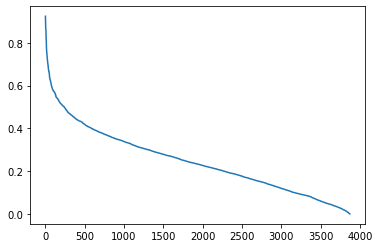

In [18]:
# numConv=32 
plt.plot(ReLU_activation_probabilities)

In [19]:
ReLU_activation_probabilities.mean(),ReLU_activation_probabilities.std()

(0.2481553460743802, 0.15029888840135827)

### LReLU

In [20]:
# Build the classification model
modelL = tf.keras.models.Sequential([
    
    # Convolution Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    
    # Fully Connected Layers
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_uniform'), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [21]:
opt = SGD(lr=0.001, momentum=0.9)
modelL.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
modelL.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4688 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3148 - accuracy: 0.8835
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2680 - accuracy: 0.9020
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2378 - accuracy: 0.9128
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2134 - accuracy: 0.9196


In [23]:
modelL.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2733 - accuracy: 0.9046


[0.2732788324356079, 0.9046000242233276]

In [24]:
list(map(lambda x: x.name, modelL.layers))

['conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'flatten_1',
 'dense_2',
 'dense_3']

In [25]:
LReLU_activation_probabilities=actProb(modelL,"conv2d_3")

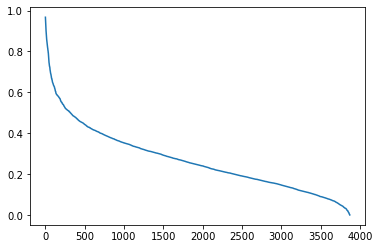

In [26]:
plt.plot(LReLU_activation_probabilities)

### htan

In [27]:
# Build the classification model
modelT = tf.keras.models.Sequential([
    
    # Convolution Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.tanh, kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    
    # Fully Connected Layers
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_uniform'), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [28]:
opt = SGD(lr=0.001, momentum=0.9)
modelT.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
modelT.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4481 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3043 - accuracy: 0.8883
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2609 - accuracy: 0.9046
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2278 - accuracy: 0.9145
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2023 - accuracy: 0.9245


In [30]:
modelT.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2798 - accuracy: 0.9040


[0.27978289127349854, 0.9039999842643738]

In [31]:
list(map(lambda x: x.name, modelT.layers))

['conv2d_4',
 'max_pooling2d_4',
 'conv2d_5',
 'max_pooling2d_5',
 'flatten_2',
 'dense_4',
 'dense_5']

In [32]:
htan_activation_probabilities=actProb_tanh(modelT,"conv2d_5")

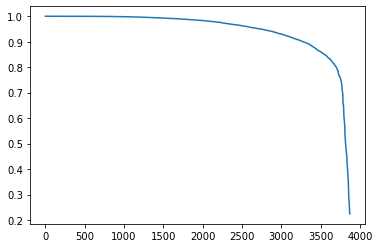

In [33]:
plt.plot(htan_activation_probabilities)

### PReLU 

In [ ]:
# tf.keras.layers.PReLU(alpha_initializer=constant(value=0.25))

In [34]:
# Build the classification model
modelP = tf.keras.models.Sequential([
    
    # Convolution Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.layers.PReLU(alpha_initializer=Constant(value=0.25)), kernel_initializer='he_uniform', padding='same')
    tf.keras.layers.MaxPooling2D((2, 2))
    
    # Fully Connected Layers
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_uniform'), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [35]:
opt = SGD(lr=0.001, momentum=0.9)
modelP.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
modelP.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4658 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3112 - accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2633 - accuracy: 0.9028
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2315 - accuracy: 0.9142
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2032 - accuracy: 0.9249


In [37]:
modelP.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.2656 - accuracy: 0.9036


[0.2655937671661377, 0.9035999774932861]

In [38]:
list(map(lambda x: x.name, modelP.layers))

['conv2d_6',
 'max_pooling2d_6',
 'conv2d_7',
 'max_pooling2d_7',
 'flatten_3',
 'dense_6',
 'dense_7']

In [39]:
PReLU_activation_probabilities=actProb(modelP,"conv2d_7")

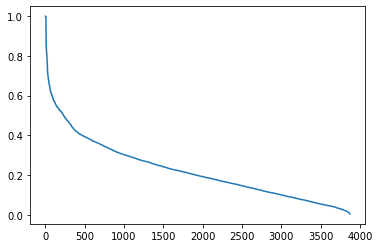

In [40]:
plt.plot(PReLU_activation_probabilities)

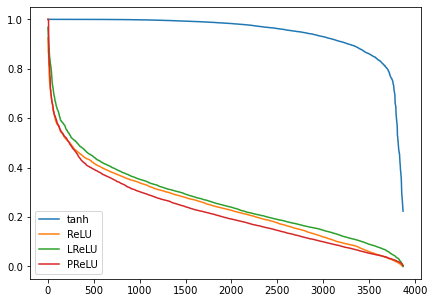

In [41]:
fig=plt.figure(figsize=(7,5))
plt.plot(htan_activation_probabilities, label='tanh')
plt.plot(ReLU_activation_probabilities, label='ReLU')
plt.plot(LReLU_activation_probabilities, label='LReLU')
plt.plot(PReLU_activation_probabilities, label='PReLU')
plt.legend()
plt.show()